In [5]:
from IPython.display import Image

Выравнивание ридов RNA-Seq:

./STAR/STAR/bin/Linux_x86_64_static/STAR --runThreadN 2 --runMode genomeGenerate --genomeDir ./res_star --genomeFastaFiles ./data/ref.fa --sjdbGTFfile ./data/genes.gtf --genomeSAindexNbases 10

./STAR/STAR/bin/Linux_x86_64_static/STAR --runThreadN 2 --genomeDir ./res_star --readFilesIn ./data/SRR453566_1.fastq ./data/SRR453566_2.fastq

Получили выравнивание Aligned.out.sam. Теперь для каждого гена найдем число ридов, выровненных на него:

htseq-count ./Aligned.out.sam ~/BIOINF/spring/ngs/HW7/data/genes.gtf > feature_count.txt

Распределение числа ридов на один ген:

In [4]:
!python3 /media/cocos/E666-2771/plot.py

7126
Figure(640x480)


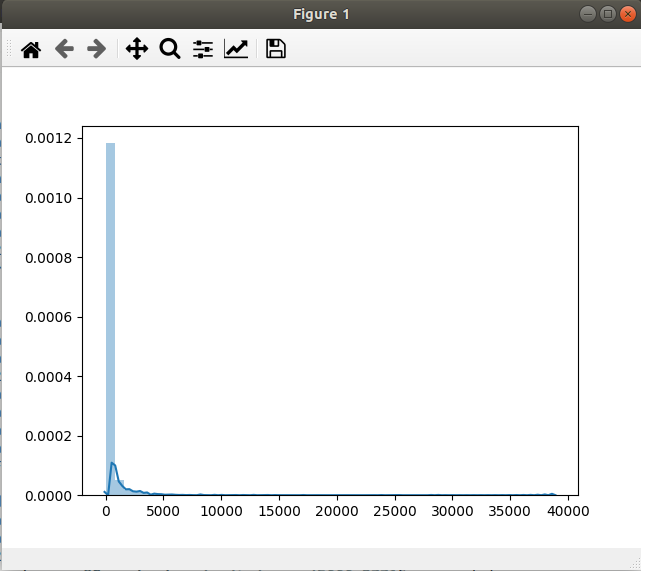

In [6]:
Image('dist.png')

Надо перевести в TPM и установить какой-нибудь порог

python ./SPAdes-3.14.0-Linux/bin/spades.py -o ./out --rna -1 ./data/SRR453566_1.fastq -2 ./data/SRR453566_2.fastq